In [26]:
import torch #PyTorch
import torch.nn as nn #torches neural network layers
import torch.nn.functional as F #helps data move forward through layer-> processing step between layers

#PyTorch Data Handling
from torch.utils.data import DataLoader #load data in  batches
from torchvision import datasets, transforms #pre-made dataset that we can pull from + image converder (MIST data)
from torchvision.utils import make_grid #display multiple images in a grid

#data Analysis/visalization
import numpy as np #math operations on array
import  pandas as pd #data in tables
from sklearn.metrics import confusion_matrix #shows where the model messed up
import matplotlib.pyplot as plt #plot graph/ images
#show plot directly in notebook
%matplotlib inline



In [27]:
#convert MIST image files into TEnsor of 4 diminions (num of images, hieght, width, color channel, )
transform= transforms.ToTensor()

In [28]:
#train data split

train_data= datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)#root: save data locally to some directory

In [29]:
#Test Data

test_data= datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [30]:
train_data #insure it worked

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [31]:
pwd

'/content'

DataLoaders

In [32]:
trian_loader=DataLoader(train_data,batch_size=10,shuffle=True ) #imported
test_loader=DataLoader(test_data,batch_size=10,shuffle=True ) #imported

Define CNN layers

In [33]:
#layers
conv1=nn.Conv2d(1,6,3,1)#Convolutinal network of 2 dimensions(image,filters=outputs, kernals, strides  )
conv2=nn.Conv2d(6,16,3,1) #previous layers outputs r these layers inputs

In [34]:
#grab 1 MNIST record/image
for i,(X_train, y_train) in enumerate(train_data):
  break

In [35]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [36]:
X_train.shape #size of image 28 by 28 pixles

torch.Size([1, 28, 28])

In [37]:
#change to 4d batch
x=X_train.view(1,1,28,28) #1 batch, 1 image,of 28 by 28

In [38]:
#first convolution

x=F.relu(conv1(x)) #activate(layer1 )->rectified linear unit=relu

In [39]:
print(x)
x.shape #one image, 6 filters, 26 by 26=image -> 28 to 26 bec padding(drops nondata pixels)

tensor([[[[0.2485, 0.2485, 0.2485,  ..., 0.2485, 0.2485, 0.2485],
          [0.2485, 0.2485, 0.2485,  ..., 0.2485, 0.2485, 0.2485],
          [0.2485, 0.2485, 0.2485,  ..., 0.2485, 0.2485, 0.2485],
          ...,
          [0.2485, 0.2485, 0.2602,  ..., 0.2485, 0.2485, 0.2485],
          [0.2485, 0.2485, 0.2279,  ..., 0.2485, 0.2485, 0.2485],
          [0.2485, 0.2485, 0.2485,  ..., 0.2485, 0.2485, 0.2485]],

         [[0.2230, 0.2230, 0.2230,  ..., 0.2230, 0.2230, 0.2230],
          [0.2230, 0.2230, 0.2230,  ..., 0.2230, 0.2230, 0.2230],
          [0.2230, 0.2230, 0.2230,  ..., 0.2230, 0.2230, 0.2230],
          ...,
          [0.2230, 0.2230, 0.3107,  ..., 0.2230, 0.2230, 0.2230],
          [0.2230, 0.2230, 0.2570,  ..., 0.2230, 0.2230, 0.2230],
          [0.2230, 0.2230, 0.2230,  ..., 0.2230, 0.2230, 0.2230]],

         [[0.0641, 0.0641, 0.0641,  ..., 0.0641, 0.0641, 0.0641],
          [0.0641, 0.0641, 0.0641,  ..., 0.0641, 0.0641, 0.0641],
          [0.0641, 0.0641, 0.0641,  ..., 0

torch.Size([1, 6, 26, 26])

In [40]:
#pass thro pooling layer-->takes biggest value in region to reduce size-->keeps strongest features
x=F.max_pool2d(x,2,2) #kernal(the matric scope or frame->extract eges or features) of 2, strindes of 2

In [41]:
x.shape #13  by 13 bec pooling is shrinking by 2 leaving most important info

torch.Size([1, 6, 13, 13])

In [42]:
#second convoultional layer-->applies the filter/kernel
x=F.relu(conv2(x))

In [43]:
x.shape #bec didnt set padding we loose 2 pixles around image

torch.Size([1, 16, 11, 11])

In [44]:
#pooling layer
x=F.max_pool2d(x,2,2) #11/2 rounded down bec cant invent data to round up
x.shape

torch.Size([1, 16, 5, 5])

Model

In [45]:
#flatten out 1D NN
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1=nn.Conv2d(1,6,3,1)
    self.conv2=nn.Conv2d(6,16,3,1)

    #Fully connected layer
    self.fc1=nn.Linear(5*5*16, 120)
    self.fc2=nn.Linear(120,84,)
    self.fc3=nn.Linear(84,10)

    #pushe thro layers
  def forward(self, X):
    X=F.relu(self.conv1(X))
    X=F.max_pool2d(X,2,2)
    #second pass
    X=F.relu(self.conv2(X))
    X=F.max_pool2d(X,2,2)

    #review data to flatten it out
    X=X.view(-1,16*5*5) #-1=vary the batch size

    #fully connected layers
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)#no relu last layer
    return F.log_softmax(X,dim=1) #dimentions of 1




In [46]:
#create instance of our Model
torch.manual_seed(41)
model=ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [47]:
#loss Function

criterion =nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)#smaller learning rate = longer to train=more accurate

Train/Test

In [48]:
import time
Start_time=time.time()

#create varibles for tracking
epochs=5
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]


#create for loop for epochs
for i in range(epoch):
  trn_corr=0
  tst_corr=0


  #train
  for b,(x_train, y_train)in enumerate(trian_loader): #train each batch-> b
    b+=1 #start our batches at one
    y_pred=model(x_train) #predicted values from trainingg set->not flattened:2D
    loss=criterion(y_pred, y_train)#compare prediction to correct answers

    predicted=torch.max(y_pred.data,1)[1] #add up num of correct predictions indexed from first point
    batch_corr=(predicted==y_train).sum() #how many we got correct from this batch--> true=1, and False=0->sum them up
    trn_corr+=batch_corr #keep track as we go along in training

    #update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print results
    if b%600==0:
      print(f'Epoch:{i} Batch:{b} loss:{loss.item()}')

  train_losses.append(loss.item())
  train_correct.append(trn_corr)


  #test
  with torch.no_grad(): #no gradient so we dont update our weights and baises with test data
    for b,(X_test, y_test)in enumerate(test_loader):
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1] #adds up correct predictions
      tst_corr+=(predicted==y_test).sum()

  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)




current_time=time.time()
total=current_time-Start_time
print(f'Trianing took:{total/60} minute')


Epoch:0 Batch:600 loss:0.16236107051372528
Epoch:0 Batch:1200 loss:0.15510495007038116
Epoch:0 Batch:1800 loss:0.4651116728782654
Epoch:0 Batch:2400 loss:0.17726822197437286
Epoch:0 Batch:3000 loss:0.007429888937622309
Epoch:0 Batch:3600 loss:0.37731707096099854
Epoch:0 Batch:4200 loss:0.004938055761158466
Epoch:0 Batch:4800 loss:0.0015040982980281115
Epoch:0 Batch:5400 loss:0.06845302879810333
Epoch:0 Batch:6000 loss:0.0004587689763866365
Epoch:1 Batch:600 loss:0.04883628338575363
Epoch:1 Batch:1200 loss:0.007730127777904272
Epoch:1 Batch:1800 loss:0.0018222120124846697
Epoch:1 Batch:2400 loss:0.005695418454706669
Epoch:1 Batch:3000 loss:8.670352690387517e-05
Epoch:1 Batch:3600 loss:0.024647679179906845
Epoch:1 Batch:4200 loss:0.0003772796771954745
Epoch:1 Batch:4800 loss:0.0037662566173821688
Epoch:1 Batch:5400 loss:0.0004308634961489588
Epoch:1 Batch:6000 loss:0.0003631356521509588
Epoch:2 Batch:600 loss:0.06800970435142517
Epoch:2 Batch:1200 loss:0.017130421474575996
Epoch:2 Batch:

Graph

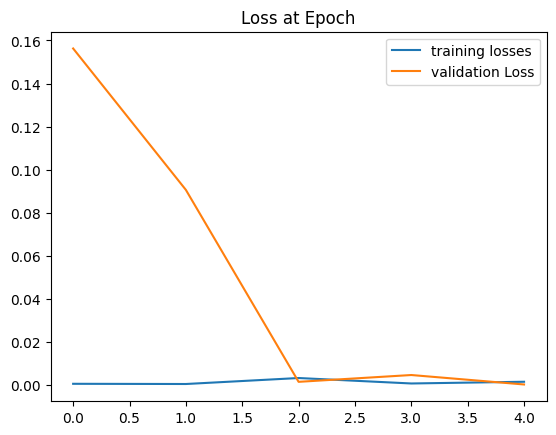

In [49]:

plt.plot(train_losses, label="training losses")
plt.plot(test_losses,label="validation Loss")
plt.title("Loss at Epoch")
plt.legend()

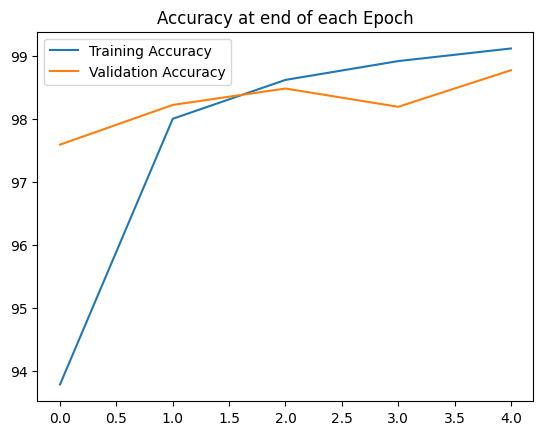

In [50]:
#graph accuracy at end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")#for itterations of 600
plt.plot([t/100 for t in test_correct],label="Validation Accuracy")
plt.title("Accuracy at end of each Epoch")
plt.legend()

In [51]:
test_load_all=DataLoader(test_data, batch_size=10000,shuffle=False)

In [52]:
with torch.no_grad():
  correct=0
  for X_test, y_test in test_load_all:
    y_val=model(X_test)
    predicted=torch.max(y_val,1)[1]
    correct+= (predicted==y_test).sum()


In [53]:
correct.item()/len(test_data)*100#out of 10000

98.77

run new image

In [54]:
#grab image
test_data[4143]#TEnsor with image  with label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [55]:
#grab just data w/o label
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [56]:
#reshape
test_data[4143][0].reshape(28,28)#28 by 28 image

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

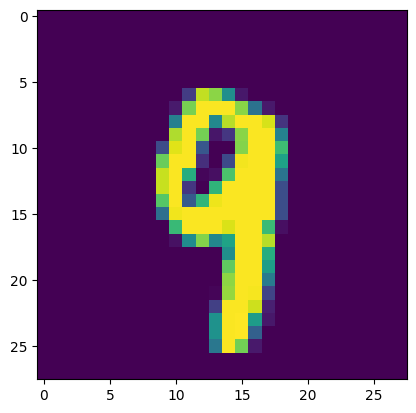

In [57]:
#show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [59]:
#pass image through model
model.eval()
with torch.no_grad(): #new prediction
  new_prediction=model(test_data[4143][0].view(1,1,28,28))#1 batch, 1 color channel, 28*28 image


In [60]:
new_prediction

tensor([[-1.8451e+01, -1.5608e+01, -2.0303e+01, -1.3904e+01, -8.6828e+00,
         -1.5358e+01, -2.6179e+01, -5.6867e+00, -1.3941e+01, -3.5686e-03]])

In [61]:
new_prediction.argmax()

tensor(9)